In [22]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = house_votes_84_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [23]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [24]:
data_3

,Class Name_democrat,Class Name_republican,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_?,adoption-of-the-budget-resolution_n,...,superfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
3,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
431,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
432,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
433,0,1,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [25]:
data_train, data_val = cross_validator.random_partition(data_3, random_state=42)

In [26]:
data = data_train.to_numpy()
X_train = data[:,2:]
y_train = data[:,:2]

In [27]:
data_test = data_val.to_numpy()
X_val = data_test[:,2:]
y_val = data_test[:,:2]

In [28]:
X_train.shape

(348, 48)

In [29]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=10)

autoE.train(X_train, max_epochs=10000, lr=0.0001)

Epoch 0/10000, Loss: 0.28257288440920847
Epoch 1/10000, Loss: 0.2566747341254794
Epoch 2/10000, Loss: 0.2367407028533641
Epoch 3/10000, Loss: 0.2214358866090782
Epoch 4/10000, Loss: 0.20976087899152632
Epoch 5/10000, Loss: 0.20093323402663113
Epoch 6/10000, Loss: 0.19432544787322462
Epoch 7/10000, Loss: 0.18943080873482737
Epoch 8/10000, Loss: 0.1858422136708461
Epoch 9/10000, Loss: 0.18323653067997506
Epoch 10/10000, Loss: 0.18136123670708712
Epoch 11/10000, Loss: 0.18002223598493086
Epoch 12/10000, Loss: 0.17907274000865456
Epoch 13/10000, Loss: 0.17840339583358292
Epoch 14/10000, Loss: 0.17793383468341326
Epoch 15/10000, Loss: 0.17760568992652642
Epoch 16/10000, Loss: 0.17737700999332143
Epoch 17/10000, Loss: 0.1772179083805083
Epoch 18/10000, Loss: 0.17710725416927828
Epoch 19/10000, Loss: 0.17703020227129396
Epoch 20/10000, Loss: 0.17697637963876528
Epoch 21/10000, Loss: 0.176938570788452
Epoch 22/10000, Loss: 0.17691177559574306
Epoch 23/10000, Loss: 0.17689254003813387
Epoch 24/

In [30]:
combined = CombinedModel(autoE,n_hidden_2=50,n_output=y_val.shape[1])

loss, val_metrics, final_loss = combined.train(X_train,y_train,X_val,y_val,epochs=15000,lr=0.00001)

Epoch 0/15000, Train Loss: 0.6929682303325889, Val Loss: 0.6929050318332217
Epoch 100/15000, Train Loss: 0.6861460620544935, Val Loss: 0.68347813562347
Epoch 200/15000, Train Loss: 0.6813634195567512, Val Loss: 0.6765166487738901
Epoch 300/15000, Train Loss: 0.6779975119730545, Val Loss: 0.6713262341013977
Epoch 400/15000, Train Loss: 0.6756158882020527, Val Loss: 0.6674154472782149
Epoch 500/15000, Train Loss: 0.6739175511823903, Val Loss: 0.6644344587077073
Epoch 600/15000, Train Loss: 0.6726923933037134, Val Loss: 0.6621326280189657
Epoch 700/15000, Train Loss: 0.6717932013407354, Val Loss: 0.6603290316081692
Epoch 800/15000, Train Loss: 0.6711162969157851, Val Loss: 0.6588919152148561
Epoch 900/15000, Train Loss: 0.6705881154249154, Val Loss: 0.6577243093945799
Epoch 1000/15000, Train Loss: 0.6701558730955997, Val Loss: 0.656753910199184
Epoch 1100/15000, Train Loss: 0.669781051311999, Val Loss: 0.6559259186914905
Epoch 1200/15000, Train Loss: 0.6694348236263875, Val Loss: 0.655197

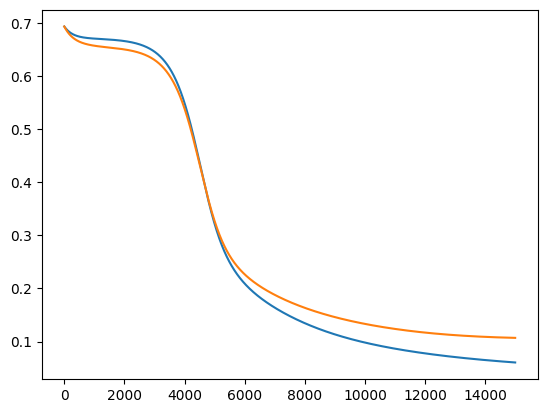

In [31]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.plot(val_metrics)

In [32]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=100,n_hidden_2=200,n_output=y_train.shape[1])

loss, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.00001)

Epoch 0/10000, Train Loss: 0.6930341821433421, Val Loss: 0.6929916300952775
Epoch 100/10000, Train Loss: 0.684798174871693, Val Loss: 0.6814968040525464
Epoch 200/10000, Train Loss: 0.6791201960901836, Val Loss: 0.6731747849295643
Epoch 300/10000, Train Loss: 0.6746669214708523, Val Loss: 0.6665362677768987
Epoch 400/10000, Train Loss: 0.670492103363685, Val Loss: 0.6605247209706278
Epoch 500/10000, Train Loss: 0.6657319380172293, Val Loss: 0.6542015096049869
Epoch 600/10000, Train Loss: 0.6593732176048367, Val Loss: 0.6465148989408939
Epoch 700/10000, Train Loss: 0.6500087129529167, Val Loss: 0.6360668813579726
Epoch 800/10000, Train Loss: 0.6355254161804889, Val Loss: 0.6208286992334606
Epoch 900/10000, Train Loss: 0.6127200674961015, Val Loss: 0.5978089413493006
Epoch 1000/10000, Train Loss: 0.5770527490769757, Val Loss: 0.5628870071096185
Epoch 1100/10000, Train Loss: 0.5235324103352338, Val Loss: 0.5117357091338645
Epoch 1200/10000, Train Loss: 0.4512756276594148, Val Loss: 0.4440

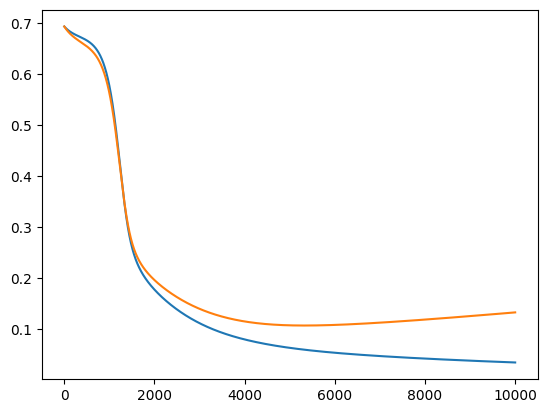

In [33]:
plt.plot(loss)
plt.plot(val_metrics)

In [34]:
linear = LinearNetwork(config)

losses, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=10000,lr=0.00001)

Epoch 0/10000, Training Loss: 0.6960435778012655, Validation Loss: 0.6913010481760371
Epoch 100/10000, Training Loss: 0.4365442213879434, Validation Loss: 0.436719929466254
Epoch 200/10000, Training Loss: 0.34184881162798764, Validation Loss: 0.3465556296151363
Epoch 300/10000, Training Loss: 0.2942488436911932, Validation Loss: 0.3016346991258513
Epoch 400/10000, Training Loss: 0.26536887444193075, Validation Loss: 0.2744751300327926
Epoch 500/10000, Training Loss: 0.24557068120370243, Validation Loss: 0.2559080360918146
Epoch 600/10000, Training Loss: 0.23083317464522876, Validation Loss: 0.24212690230702608
Epoch 700/10000, Training Loss: 0.21921604493562258, Validation Loss: 0.23129556238504143
Epoch 800/10000, Training Loss: 0.20967577649279504, Validation Loss: 0.22242571646975803
Epoch 900/10000, Training Loss: 0.20160223161537683, Validation Loss: 0.2149391954625641
Epoch 1000/10000, Training Loss: 0.19461422272968093, Validation Loss: 0.2084748546400038
Epoch 1100/10000, Train